In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
categorical = ['school','sex','address','famsize','Pstatus','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','Fjob','Mjob','reason']

The data contains many categorical fields which need to be encoded

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# apply lable encoder on categorical binary feature columns
df[categorical] = df[categorical].apply(lambda col: labelencoder.fit_transform(col)) 

In [5]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [6]:
#Removing Mother's, Father job, reason and guardian fields.
df = df.drop(['school','Mjob','Fjob','reason','guardian'],axis = 1)

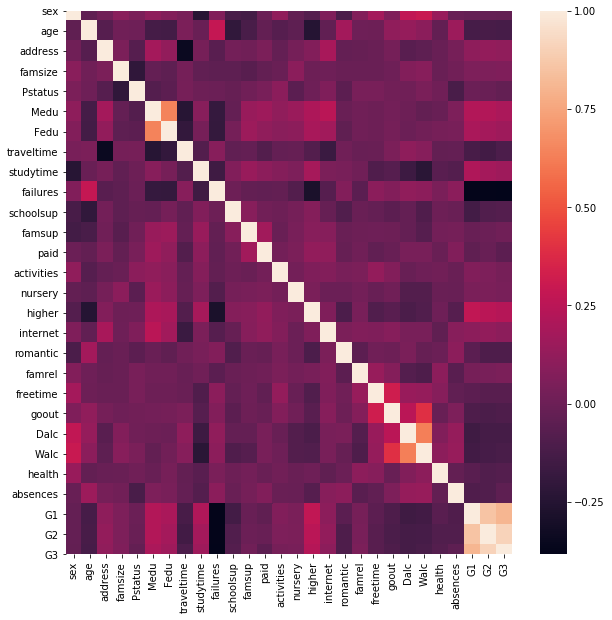

In [7]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation)
plt.show()

After analysis of the feature correlations (as explained in report), the following features were dropped.

In [8]:
df = df.drop(['sex','famsize','Pstatus','famsup','paid','activities','nursery','famrel','freetime','absences'],axis = 1)

In [9]:
df.head(5)

,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,higher,internet,romantic,goout,Dalc,Walc,health,G1,G2,G3
0,18,1,4,4,2,2,0,1,1,0,0,4,1,1,3,5,6,6
1,17,1,1,1,1,2,0,0,1,1,0,3,1,1,3,5,5,6
2,15,1,1,1,1,2,3,1,1,1,0,2,2,3,3,7,8,10
3,15,1,4,2,1,3,0,0,1,1,1,2,1,1,5,15,14,15
4,16,1,3,3,1,2,0,0,1,0,0,2,1,2,5,6,10,10


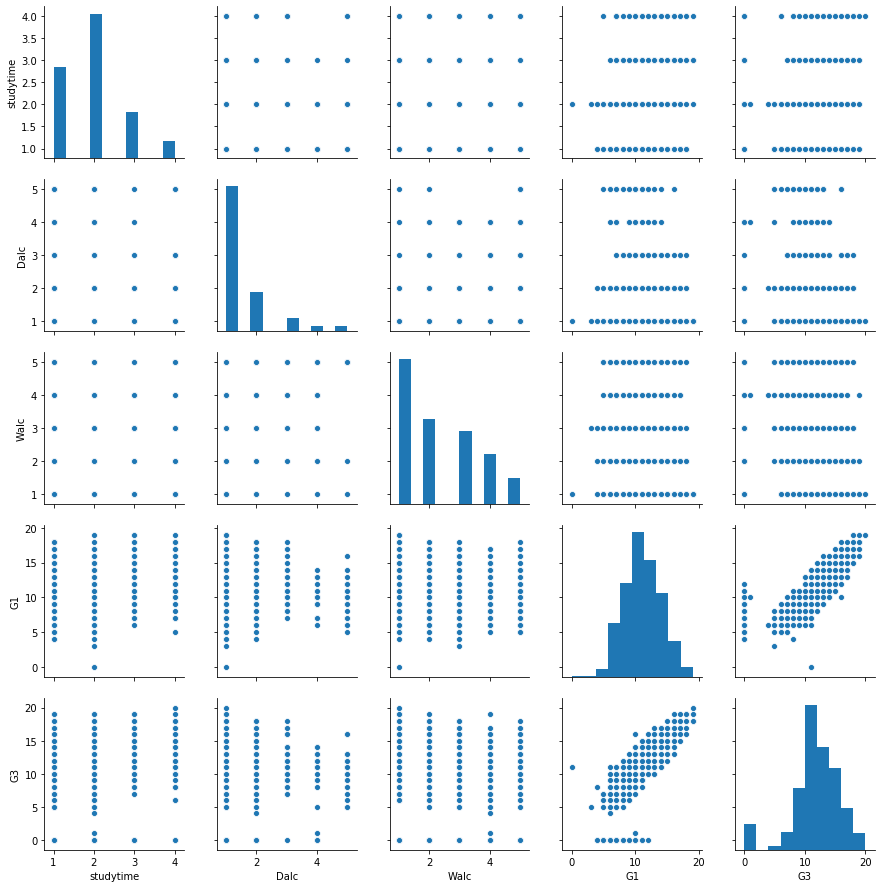

In [10]:
#Pair plots of few of the features
sns.pairplot(df[['studytime','Dalc','Walc','G1','G3']])
plt.show()

Students who consume more alcohol daily have scored less, but the weekend alcohol consumption has not affected the outcome much. On the other hand, previous scores and the outcome have a very linear relationship. Which encourages us to use Linear Regression for now.

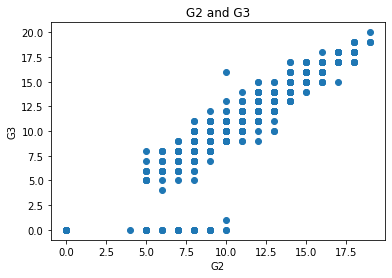

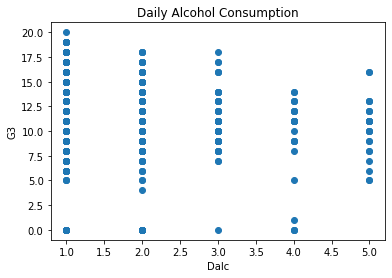

In [11]:
plt.scatter(df['G2'],df['G3'])
plt.title('G2 and G3')
plt.xlabel('G2')
plt.ylabel('G3')
plt.savefig('g2g3.png')
plt.show()
plt.scatter(df['Dalc'],df['G3'])
plt.title('Daily Alcohol Consumption')
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.savefig('dalc.png')
plt.show()
y = df['G3'] #To be predicted
X = df.drop(['G3'],axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Predicting and displaying the first 20 values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

,Actual,Predicted
550,6,7.086747
78,10,7.328239
335,15,15.557448
708,13,13.354111
99,8,8.657709
622,11,11.238516
165,12,11.154799
94,14,12.950529
867,16,14.571995
702,14,11.155068


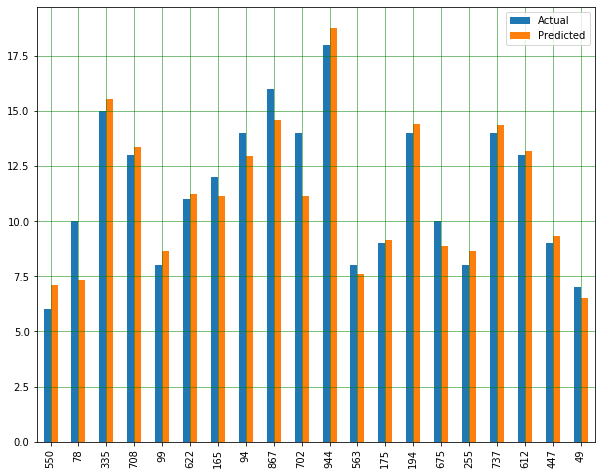

In [16]:
#Plotting the actual and predicted values as a bar graph
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
#Checking the performance of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.840323357806673
Mean Squared Error: 1.9122791160804276
Root Mean Squared Error: 1.3828518055382606


Prediction Root Mean Squared Error is 1.382, which is satisfactory 

In [18]:
from sklearn.svm import SVR# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)#5 Predicting a new result
y_pred = regressor.predict(X_test)

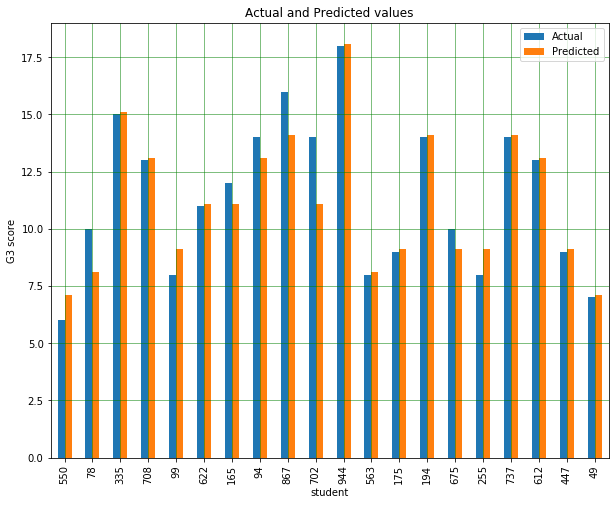

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
#Plotting the actual and predicted values as a bar graph
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual and Predicted values')
plt.xlabel('student')
plt.ylabel('G3 score')
plt.savefig('predict2.png')
plt.show()

In [20]:
#Checking the performance of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7474999842033714
Mean Squared Error: 1.8723460779853631
Root Mean Squared Error: 1.3683369753044616


In the above case, the previous grades of the students have been considered while predicting the preformance. It is more challenging and useful to predict the performance of the students without considering their previous score. We hence drop the G1 and G2 features from the dataset. 

In [21]:
X = X.drop(['G1','G2'],axis = 1)
X

,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,higher,internet,romantic,goout,Dalc,Walc,health
0,18,1,4,4,2,2,0,1,1,0,0,4,1,1,3
1,17,1,1,1,1,2,0,0,1,1,0,3,1,1,3
2,15,1,1,1,1,2,3,1,1,1,0,2,2,3,3
3,15,1,4,2,1,3,0,0,1,1,1,2,1,1,5
4,16,1,3,3,1,2,0,0,1,0,0,2,1,2,5
5,16,1,4,3,1,2,0,0,1,1,0,2,1,2,5
6,16,1,2,2,1,2,0,0,1,1,0,4,1,1,3
7,17,1,4,4,2,2,0,1,1,0,0,4,1,1,1
8,15,1,3,2,1,2,0,0,1,1,0,2,1,1,1
9,15,1,3,4,1,2,0,0,1,1,0,1,1,1,5


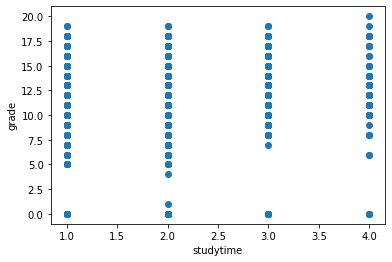

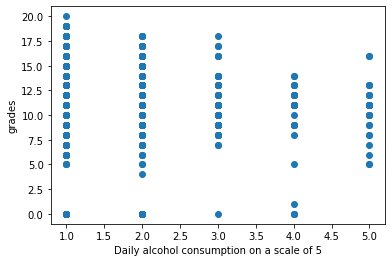

In [22]:
plt.scatter(X['studytime'],y)
plt.xlabel('studytime')
plt.ylabel('grade')
plt.show()
plt.scatter(X['Dalc'],y)
plt.xlabel('Daily alcohol consumption on a scale of 5')
plt.ylabel('grades')
plt.show()

From the above graphs it is clear that attributes like study time and daily alcohol consumption are not linearly related to the outcome. In addition we have removed the previous score features. Thus, we require a non linear model to fit the data.

### Training a non linear model 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)
regressor = SVR(kernel='rbf', tol = 0.0001, C = 0.7,epsilon = 0.0005, gamma = 'auto')
regressor.fit(X_train,y_train)#5 Predicting a new result
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.8156440017400712
Mean Squared Error: 5.659504043024194
Root Mean Squared Error: 2.378971215257594


In [24]:
#ArtificalNeuralNetworks
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
# define base model
def baseline_model():
        # create model
        model = Sequential()
        model.add(Dense(50, input_dim=15, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs = 10, batch_size=10, verbose=0)
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)
test_error = np.square((y_test - prediction))
mean_error = np.sqrt(np.sum(test_error)/(test_error.shape))
print("Root Mean Squared Error: ", mean_error)

Using TensorFlow backend.


Root Mean Squared Error:  [2.43520118]


### Testing the model with dataset obtained from fellow students

In [25]:
self_test_df = pd.read_csv('test_final.csv')

In [26]:
X_train = X.drop(['schoolsup','traveltime','health','internet'],axis = 1)
y_train = y
y_test = self_test_df['Grade %']
X_test = self_test_df.drop(['Grade %'],axis = 1)
X_test = X_test.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)#5 Predicting a new result
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.37916119972691
Mean Squared Error: 9.250382792841222
Root Mean Squared Error: 3.041444195253502


In [28]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 3.3143845062134565


In [29]:
#SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)#5 Predicting a new result
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.324963961446334
Mean Squared Error: 32.507283700156634
Root Mean Squared Error: 5.701515912470703
